# Recommendation System Project
##### [1. Word Cloud Generation with 지원동기+느낀점 / 소감+평가+전하고싶은말](#1.-Word-Cloud-Generation)
##### [2. KCluster with values from word cloud](#2.-KCluster)
##### [3. FFM Prediction](#3.-FFM)

## 1. Word Cloud Generation

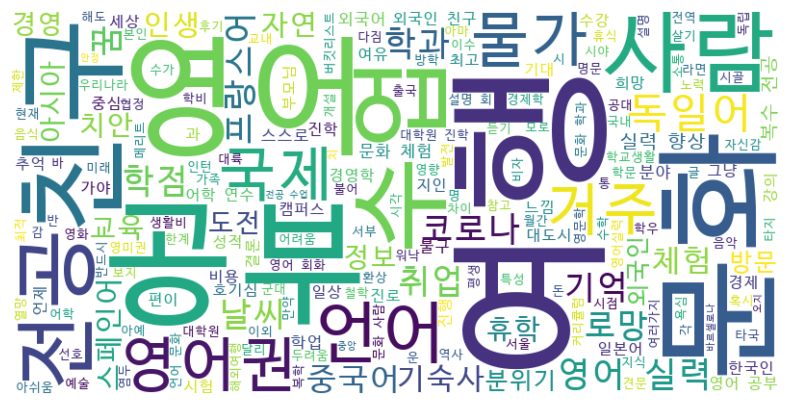

In [1]:
from extract_helper import *
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from konlpy.tag import Okt
import os

path_to_files = "data_set"
files_to_process = ["page_1_to_10.csv", "page_11_to_22.csv", "page_22_to_100.csv", "page_23_to_100.csv", "page_101_to_200.csv", "page_201_to_300.csv", "page_301_to_376.csv"]

# 불용어 처리
stopwords = set()
with open("stopwords.txt", 'r', encoding='utf-8') as file:
    for line in file:
        words = line.split()  # 기본적으로 공백을 기준으로 split
        stopwords.update(words)  # set에 words 추가 (중복 제거)

# 각 파일에서 '지원 동기'에 해당하는 부분 parse
cleaned_text = ""
for file_name in files_to_process:
    file_path = os.path.join(path_to_files, file_name)
    df = pd.read_csv(file_path)
    
    df['Selected Content'] = df.apply(select_content, axis=1)
    reasons = df['Processed Content'] = df.apply(process_content, axis=1)

    # 2. 형태소 분석기로 명사 추출
    text = ' '.join(reasons.dropna())  # 모든 텍스트를 결합

    okt = Okt()  # Okt 형태소 분석기 생성
    nouns = okt.nouns(text)  # 명사만 추출

    # 3. 명사 리스트를 하나의 문자열로 변환
    cleaned_text += ' '.join(nouns)

# 4. WordCloud 객체 생성
font_path = "/Users/gayeonlee/Library/Fonts/D2Coding-Ver1.3.2-20180524.ttc"
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path, stopwords=stopwords).generate(cleaned_text)

# 5. 워드 클라우드 표시
plt.figure(figsize=(10, 5))
plt.rc('font', family='NanumGothicOTF')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 제거
plt.show()

